# AgriSens : SMART CROP RECOMMENDATIONS

In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df= pd.read_csv('Crop_recommendation.csv')

# Data Analysis

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


This dataset consists of **2200 rows** in total.

**Each row has 8 columns representing Nitrogen, Phosphorous, Potassium, Temperature, Humidity, PH, Rainfall and Label**

NPK(Nitrogen, Phosphorous and Potassium) values represent the NPK values in the soil. Temperature, humidity and rainfall are the average values of the sorroundings environment respectively. PH is the PH value present in the soil. **The Label column tells us the type of crop that's best suited to grow based on these conditions.**  
**Label is the value we will be predicting**

In [6]:
df.tail

<bound method NDFrame.tail of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [7]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
df.size

17600

In [9]:
df.shape

(2200, 8)

In [10]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

<Axes: >

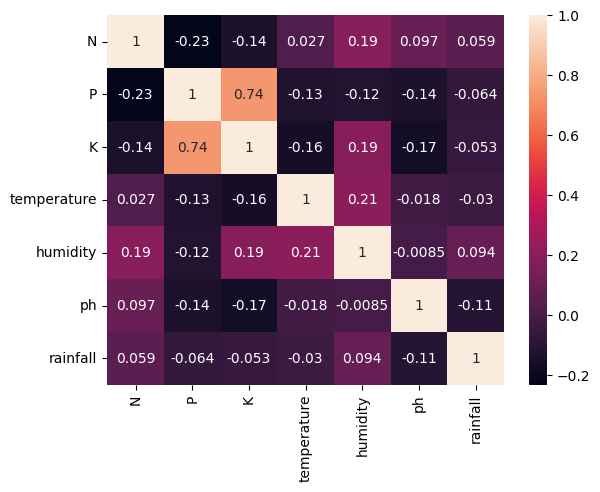

In [14]:
numeric_df = df.select_dtypes(include='number')  # Select numeric columns only
sns.heatmap(numeric_df.corr(), annot=True)

In [15]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [16]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [17]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# 1. Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [21]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# 2.Guassian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [24]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# 3.Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [27]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# 4.Logistic Refression

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [29]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving Trained Logistic Regression Model

In [30]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# 5.Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=5)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [32]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 1.        , 0.99545455, 0.99545455, 0.98636364])

### Saving Trained Random Forest Model

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RF.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# 6.XGBoost

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming Ytrain is your target variable
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Assuming Ytest is your test set target variable
Ytest_encoded = label_encoder.transform(Ytest)

predicted_values = XB.predict(Xtest)

x = accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest_encoded, predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [40]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Assuming target is your target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

XB = xgb.XGBClassifier()

# Use StratifiedKFold to maintain class distribution during cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation score (XGBoost)
score = cross_val_score(XB, features, target_encoded, cv=cv)
score

array([0.99318182, 0.98863636, 0.99090909, 0.99772727, 0.99318182])

### Saving Trained XGBoost Model

In [41]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# 7. KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, classification_report

# Create and train the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(Xtrain, Ytrain)  

# Predict on the test set
y_pred = classifier.predict(Xtest) 

# Calculate accuracy
accuracy = accuracy_score(Ytest, y_pred)
acc.append(accuracy)
model.append('KNN')
print("KNN classifier's Accuracy is:", accuracy) 

# Print classification report
print(classification_report(Ytest, y_pred))


KNN classifier's Accuracy is: 0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

### Saving trained KNN Model

In [43]:
import pickle

# Define the filename for saving the KNeighborsClassifier model
KNN_pkl_filename = 'KNeighborsClassifier.pkl'

# Open the file to save the KNeighborsClassifier model as a pkl file
with open(KNN_pkl_filename, 'wb') as KNN_Model_pkl:
    # Dump the trained KNeighborsClassifier object into the pkl file
    pickle.dump(classifier, KNN_Model_pkl)

# No need to close the pickle file explicitly as we are using 'with' statement


# ACCURACY COMPARISON

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

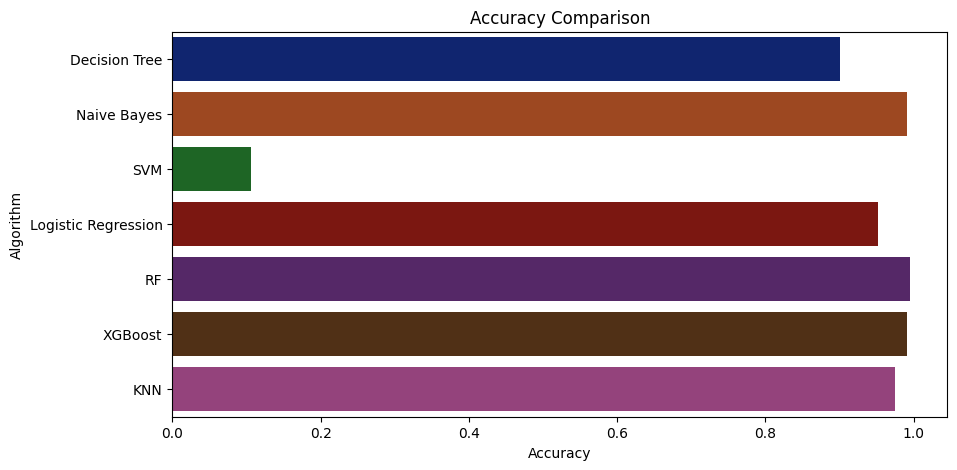

In [44]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

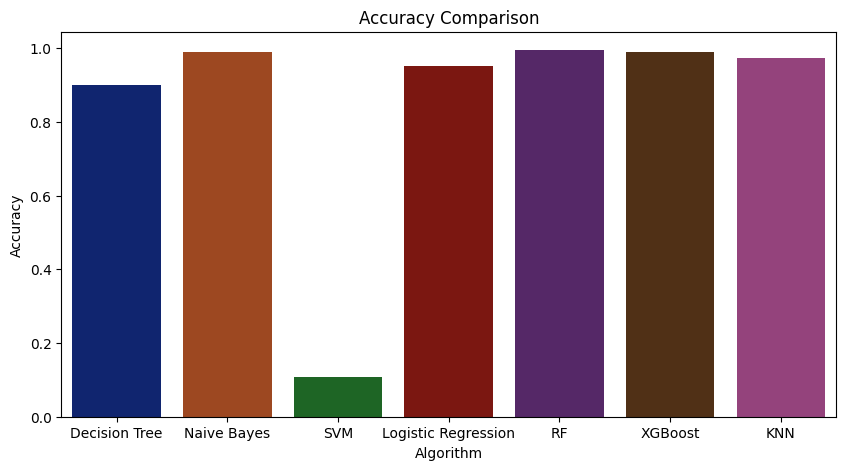

In [45]:
plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=acc, palette='dark')
plt.show()

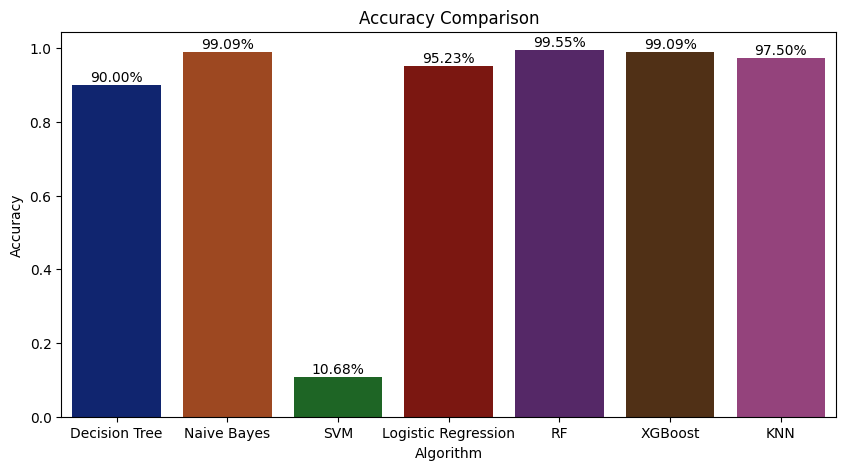

In [46]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=acc, palette='dark')

# Add accuracy percentages above each bar
for i, accuracy in enumerate(acc):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2%}', ha='center')

plt.show()


# Making a Prediction

In [47]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [48]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [49]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [50]:
data = np.array([[101,11, 36, 23.603016, 60.3, 6.1, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [51]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [52]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [53]:
import joblib

In [54]:
import pandas as pd

print(df.head())

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Check for duplicate rows
print('\nNumber of duplicate rows:', df.duplicated().sum())

# Check the data types of each column
print('\nData types of each column:')
print(df.dtypes)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of duplicate rows: 0

Data types of each column:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (1760, 7) (1760,)
Testing set: (440, 7) (440,)


# Accuracy of Random Forest Model for each crop

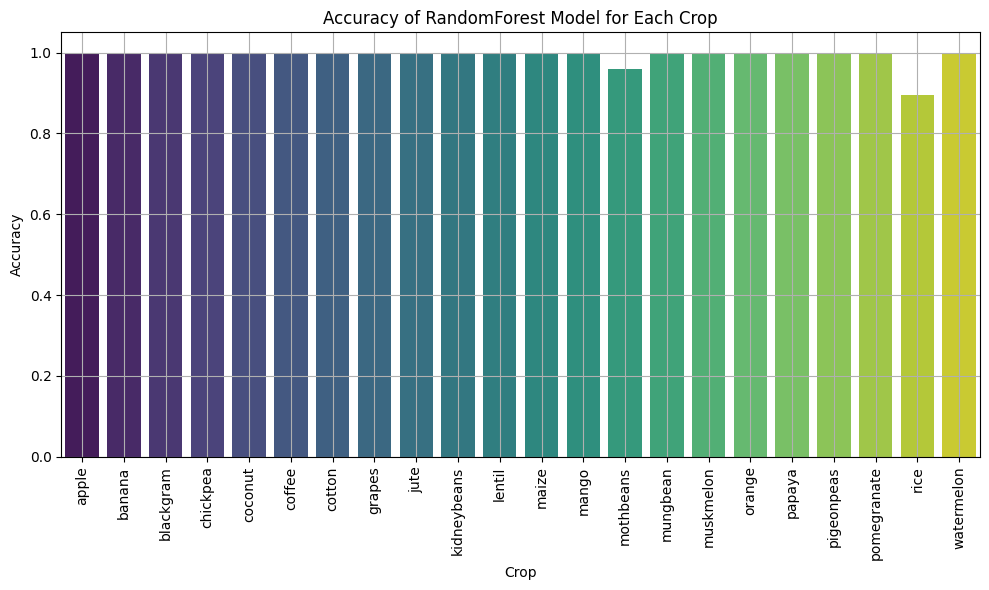

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForest model
RF_model = RandomForestClassifier(n_estimators=20, random_state=5)
RF_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = RF_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the RandomForest model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of RandomForest Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
#plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

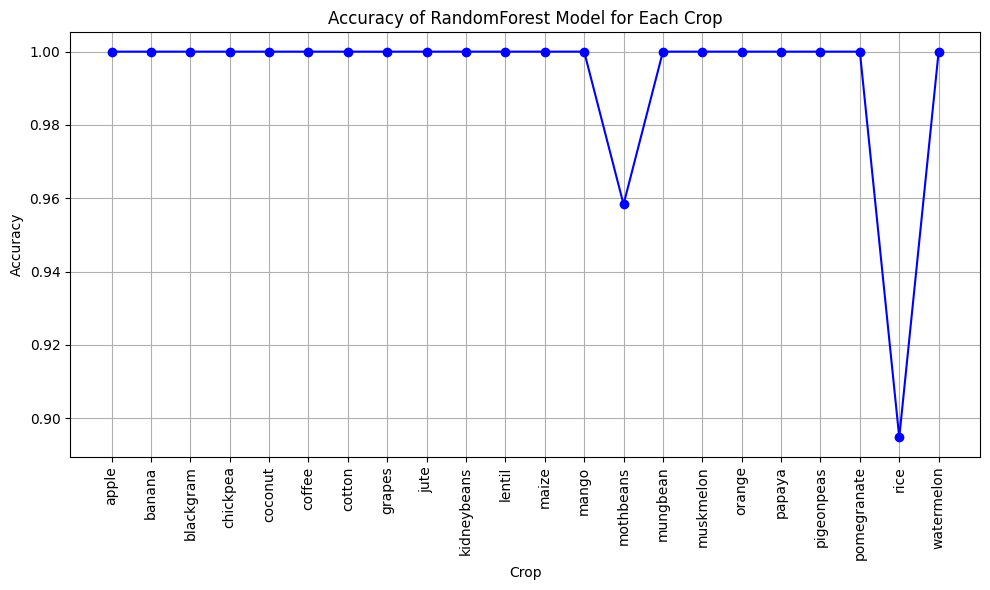

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the RandomForest model
RF_model = RandomForestClassifier(n_estimators=20, random_state=5)
RF_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = RF_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the RandomForest model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='blue', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of RandomForest Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
#plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy of Decision Tree Model for each crop

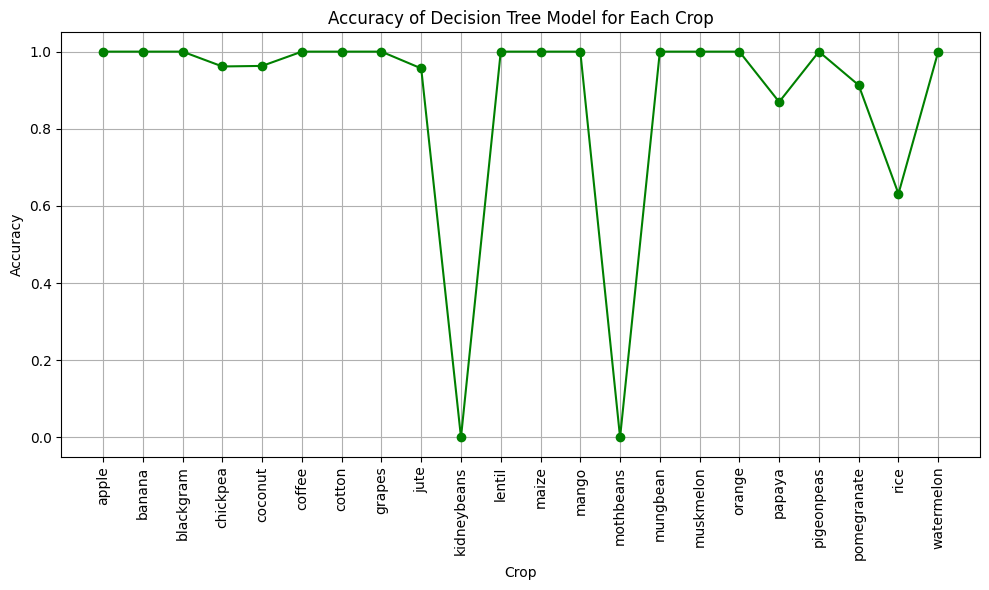

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DT_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = DT_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Decision Tree model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='green', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Decision Tree Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

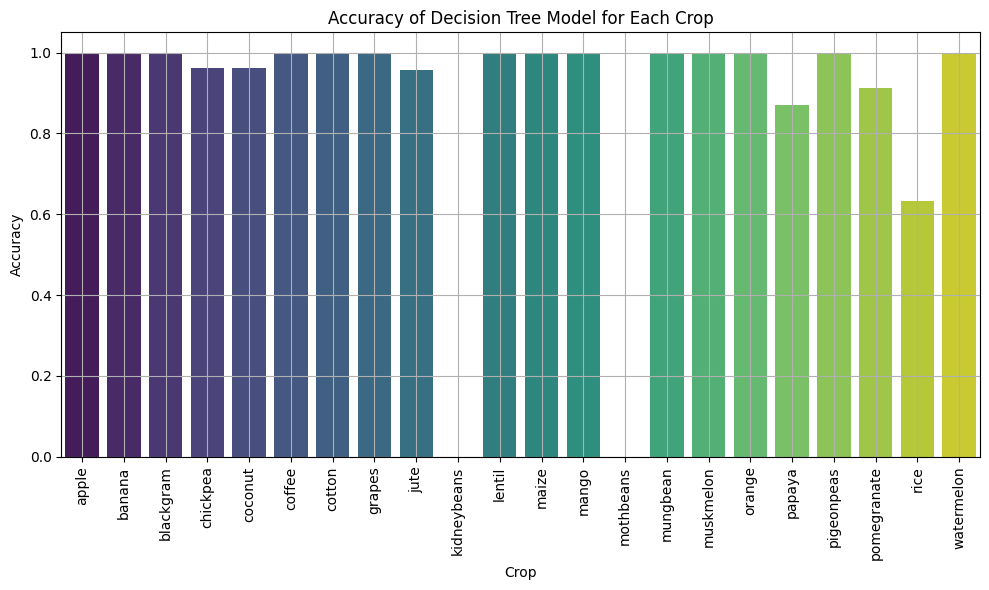

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DT_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = DT_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Decision Tree model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Decision Tree Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy of Naive Bayes Model for each crop

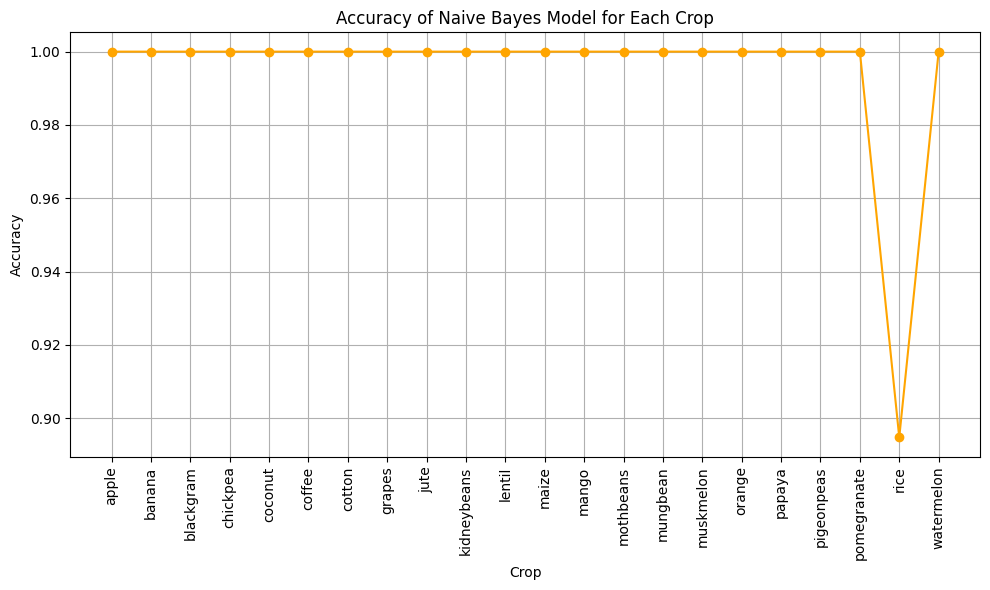

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train the Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = NB_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Naive Bayes model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='orange', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Naive Bayes Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


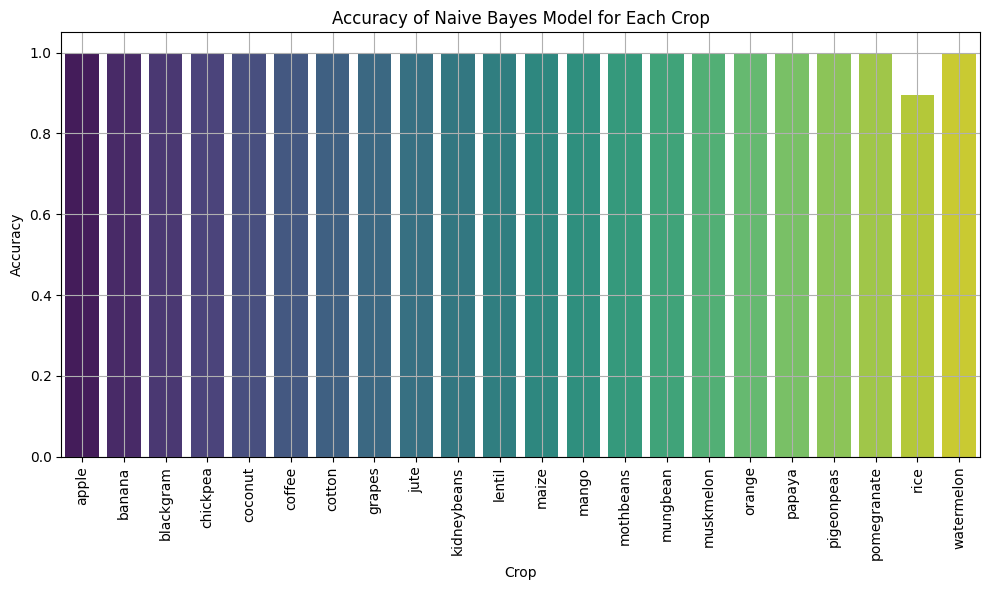

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train the Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = NB_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Naive Bayes model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Naive Bayes Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


# Accuracy of SVM Model for each crop

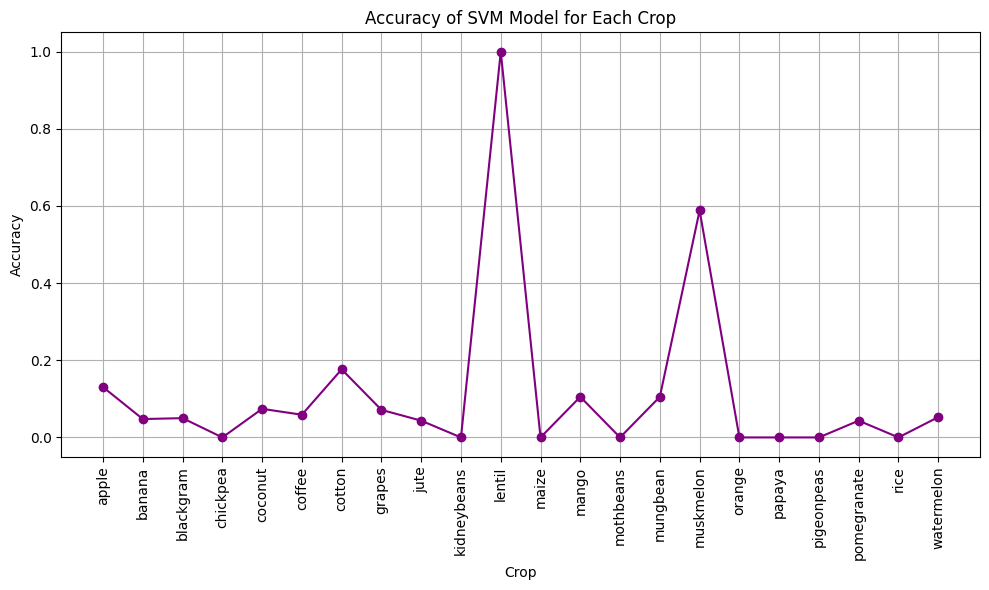

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize and train the SVM model
SVM_model = SVC(gamma='auto')
SVM_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = SVM_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the SVM model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='purple', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of SVM Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


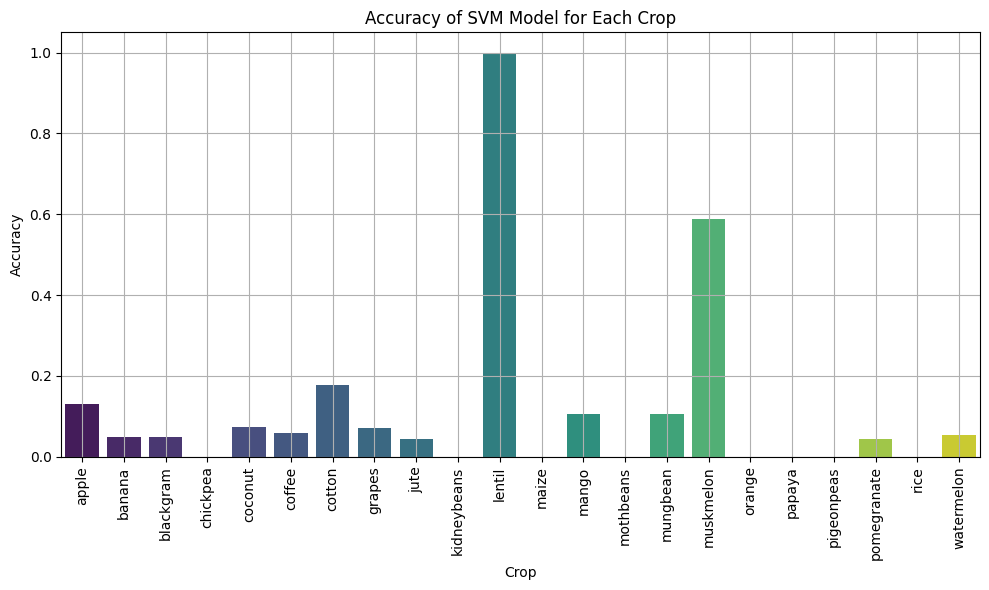

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize and train the SVM model
SVM_model = SVC(gamma='auto')
SVM_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = SVM_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the SVM model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of SVM Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


# Accuracy of Logistic Regression Model for each crop

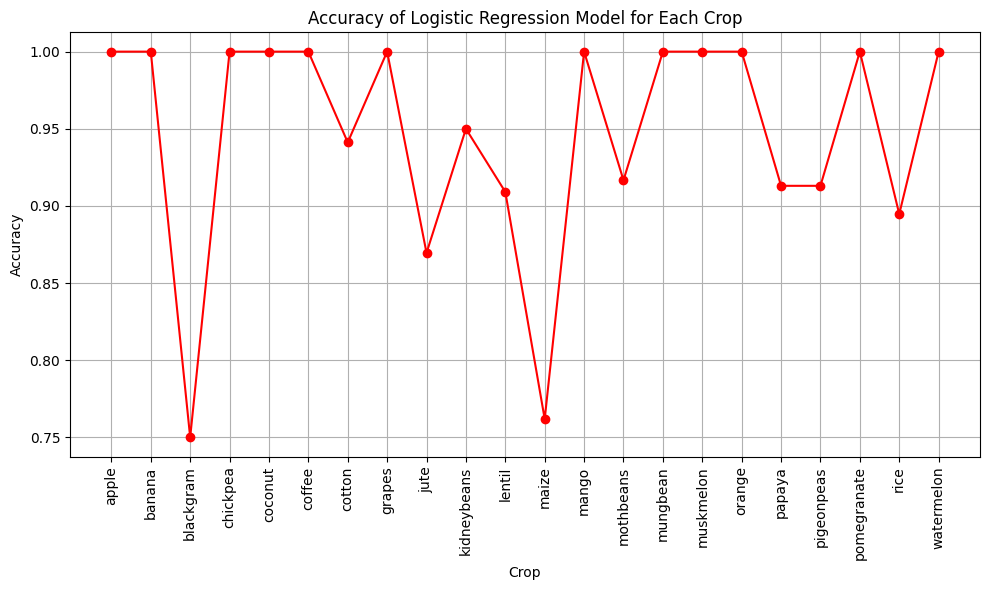

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=2)
LR_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = LR_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Logistic Regression model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='red', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of Logistic Regression Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

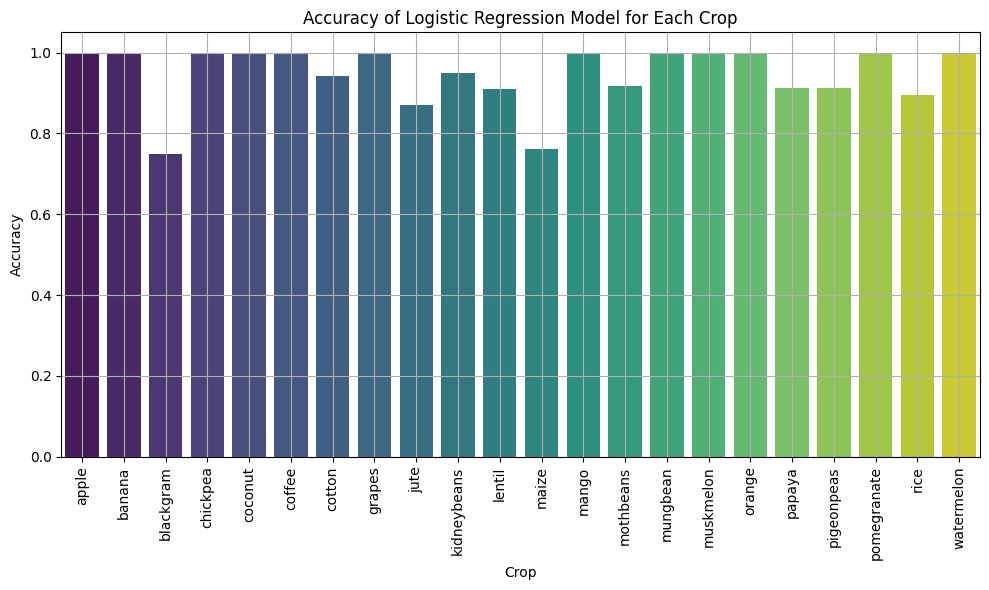

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(random_state=2)
LR_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = LR_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the Logistic Regression model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Logistic Regression Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy of KNN Model for each crop

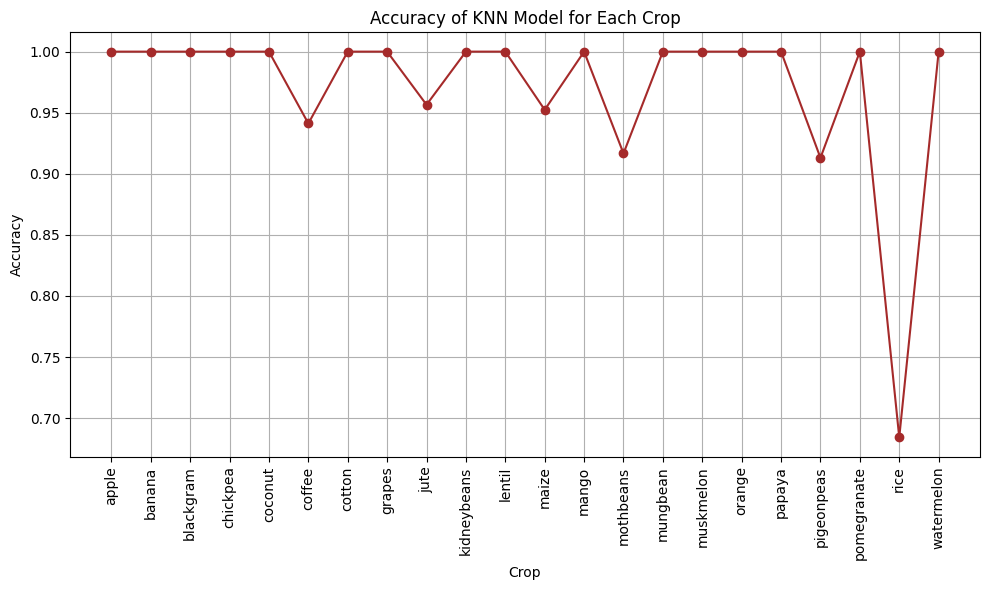

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = KNN_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the KNN model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='brown', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of KNN Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

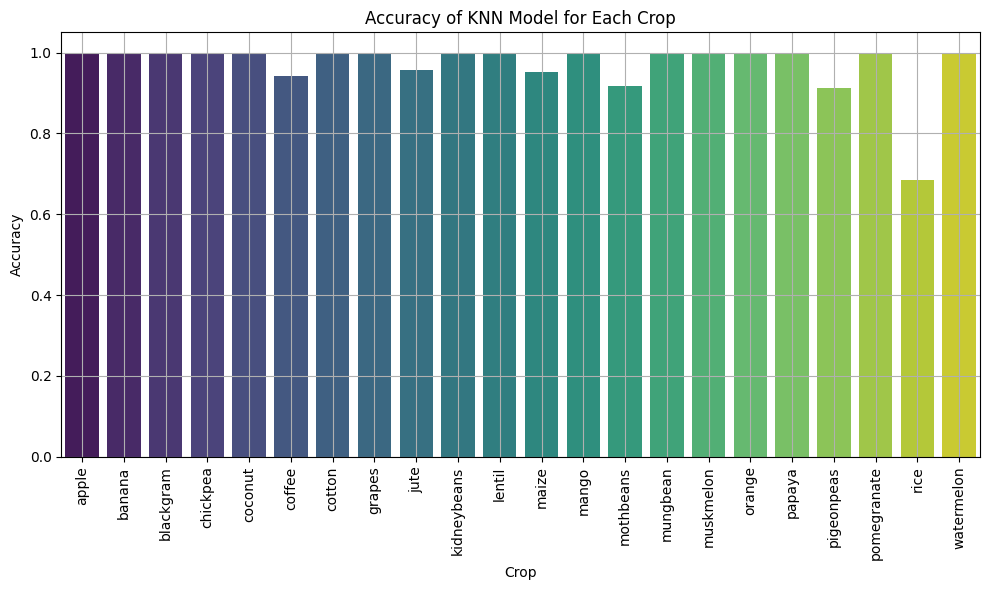

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = KNN_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the KNN model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of KNN Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy of XGBoost Model for each crop

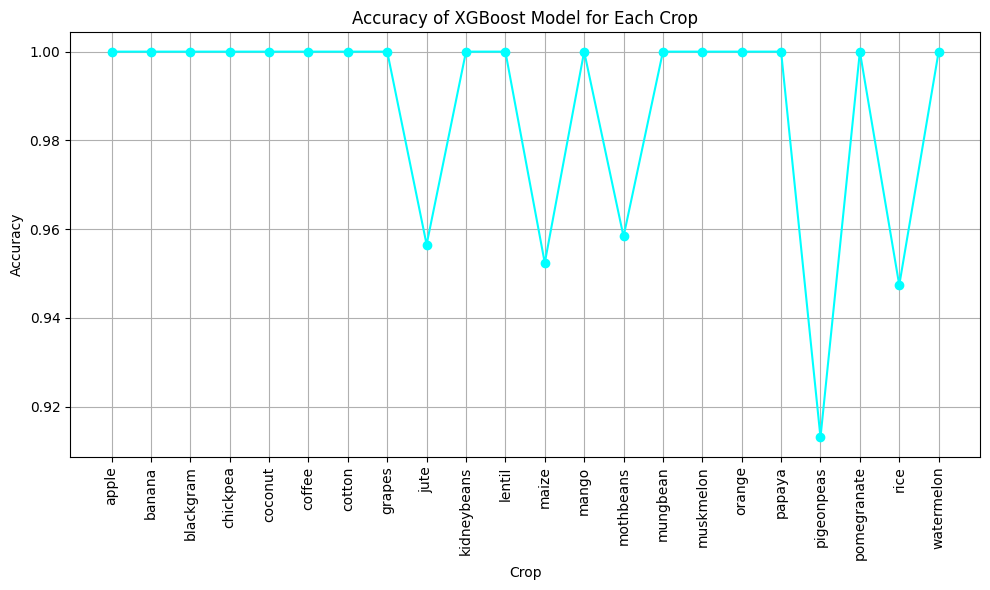

In [68]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize and train the XGBoost model
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = XGB_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the XGBoost model for each crop
plt.figure(figsize=(10, 6))
plt.plot(crop_labels, accuracy_per_crop, marker='o', color='cyan', linestyle='-')
plt.xticks(rotation=90)
plt.title('Accuracy of XGBoost Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


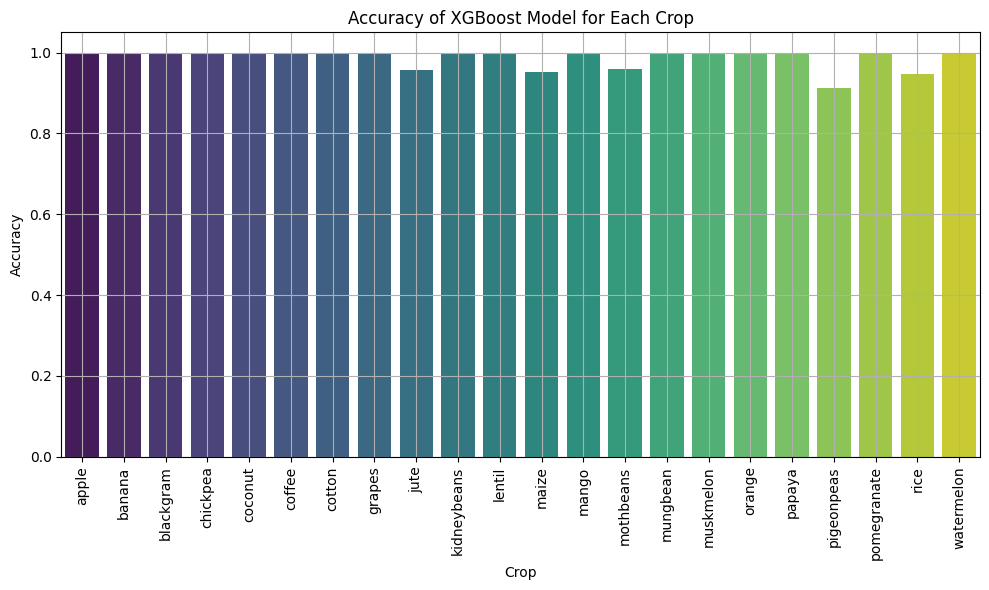

In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize and train the XGBoost model
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)

# Predict crop labels for the testing set
predicted_labels = XGB_model.predict(X_test)

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], predicted_labels[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy of the XGBoost model for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of XGBoost Model for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
data = np.array([[1, 7, 3, 50, 39.90, 3, 70.2]])
prediction = RF.predict(data)
print(prediction)

['mothbeans']
